## Install TAS plot

```pip install git+https://bitbucket.org/jsteven5/tasplot.git```

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tasplot
%config InlineBackend.figure_format='retina'

In [20]:
XRF_data = pd.read_excel('../data/geochemistry/XRF_data.xlsx')
XRF_data

,Specimen,OR24-2 tuff clast in Orinda,OR24-4 lower Moraga basalt
0,SiO2,65.63,51.03
1,TiO2,0.3,1.47
2,Al2O3,19.61,16.66
3,Fe2O3T,0.73,9.49
4,MnO,0.02,0.12
5,MgO,0.19,6.47
6,CaO,1.85,10.49
7,Na2O,5.34,3.19
8,K2O,6.54,0.54
9,P2O5,0.07,0.2


In [21]:
XRF_data = XRF_data.set_index('Specimen').T
XRF_data

Specimen,SiO2,TiO2,Al2O3,Fe2O3T,MnO,MgO,CaO,Na2O,K2O,P2O5,...,U,Th,Sc,Pb,Cr+Ni,Nb/Y,Ti,Zr/Ti,CaO/Al2O3,Sr/Y
OR24-2 tuff clast in Orinda,65.63,0.3,19.61,0.73,0.02,0.19,1.85,5.34,6.54,0.07,...,4.3,17.1,5,24,24,0.597403,1798.5,0.076731,0.09434,12.077922
OR24-4 lower Moraga basalt,51.03,1.47,16.66,9.49,0.12,6.47,10.49,3.19,0.54,0.2,...,<0.5,1,31,3,223,0.242537,8812.65,0.014525,0.629652,11.492537


In [24]:
XRF_data.columns

Index(['SiO2', 'TiO2', 'Al2O3', 'Fe2O3T', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'Total', 'LOI', 'Rb', 'Sr', 'Y', 'Zr', 'V', 'Ni', 'Cr', 'Nb',
       'Ga', 'Cu', 'Zn', 'Co', 'Ba', 'La', 'Ce', 'U', 'Th', 'Sc', 'Pb',
       'Cr+Ni', 'Nb/Y', 'Ti', 'Zr/Ti', 'CaO/Al2O3', 'Sr/Y'],
      dtype='object', name='Specimen')

In [61]:
OR24_2_S = XRF_data['SiO2'][0]
OR24_2_TA = XRF_data['Na2O'][0]+XRF_data['K2O'][0]

OR24_4_S = XRF_data['SiO2'][1]
OR24_4_TA = XRF_data['Na2O'][1]+XRF_data['K2O'][1]

Moraga_tuff_S = 68.5 #unpublished data from Brimhall lecture slides
Moraga_tuff_TA = 4.5 

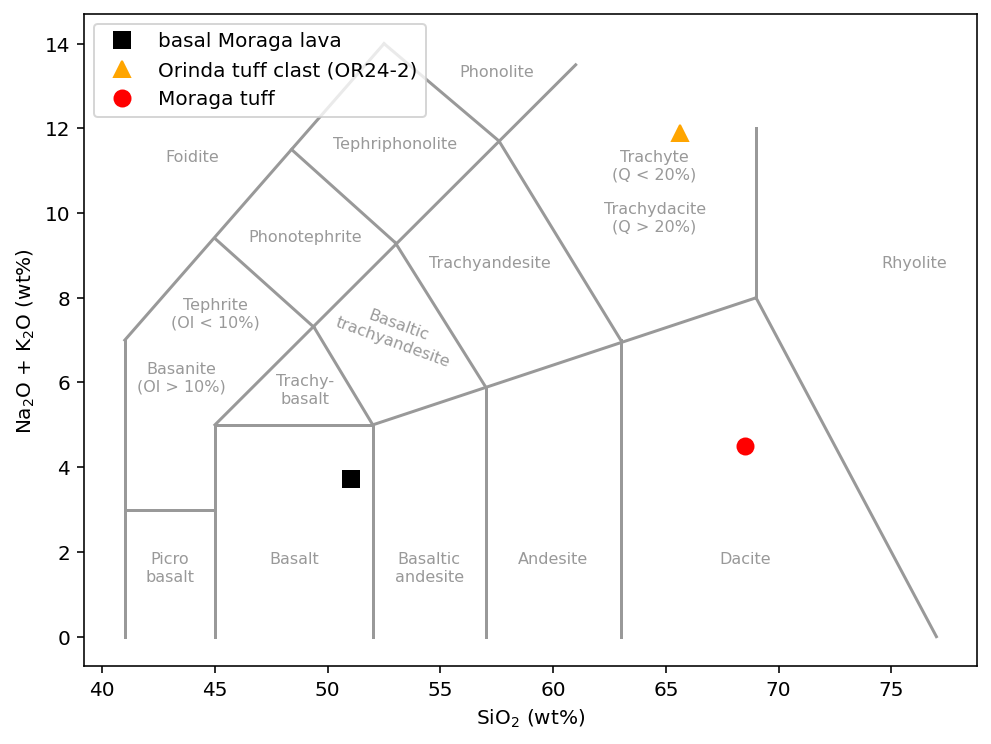

In [62]:

 
# Set up figure
fig = plt.figure(figsize=(8,6))  # create figure
ax1 = plt.subplot(111)  # create axes and store as variable
tasplot.add_LeMaitre_fields(ax1)  # add TAS fields to plot
 
# Note that you can change the default colour and font size e.g.
# >>> tasplot.add_LeMaitre_Fields(ax1, color='red', fontsize=8)
ax1.plot(OR24_4_S, OR24_4_TA, 's', alpha=1,
         label='basal Moraga lava',markersize=8,
         color='black')
ax1.plot(OR24_2_S, OR24_2_TA, '^', alpha=1,
         label='Orinda tuff clast (OR24-2)',markersize=8,
         color='orange')
ax1.plot(Moraga_tuff_S, Moraga_tuff_TA, 'o', alpha=1,
         label='Moraga tuff',markersize=8, 
         color='red')

 
# Decorate the plot
plt.xlabel(r'SiO$_2$ (wt%)')  # Use LaTeX notation for subscript
plt.ylabel(r'Na$_2$O + K$_2$O (wt%)')
plt.legend(loc='upper left', numpoints=1)
plt.show()